# COMPSCI 690V - Midterm - Text analysis and visualization

### Team members: 
1. Chao-Ching Chiang
2. Bailin Wang
3. Jin Zhang

### Datasets
1. USA Geolocated Twitter dataset: http://followthehashtag.com/datasets/free-twitter-dataset-usa-200000-free-usa-tweets/

In [1]:
import numpy as np
import pandas as pd
from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from utils import extract_hashtags, count_cooccurence

output_notebook()

Loading BokehJS ...

## Objective 1 - Analyze hashtags in tweets

### Read in USA Twitter dataset

In [2]:
fpath = './data/USA-Geolocated-tweets/dashboard_x_usa_x_filter_nativeretweets.xlsx'
df = pd.read_excel(fpath, sheetname='Stream')
tweets = df['Tweet content']
print('Number of tweets: {}'.format(len(tweets)))

Number of tweets: 204820


### Extract hashtags from tweets and count their co-occurence

In [3]:
# Set the threshold for the hashtags. We only extract hashtags whose count is higher than the threshold. 
threshold = 700

id2word, word2id = extract_hashtags(tweets, threshold)
co_occurence = count_cooccurence(tweets, word2id)

### Plot the co-coocurence graph of the hashtags

In [4]:
np.random.seed(0)

# Set the position for the nodes
words = [x for x in word2id.keys()]
pos = np.random.rand(len(words), 2)

# Draw a scatter plot to show the node relations
s = ColumnDataSource(data=dict(x=pos[:, 0], y=pos[:, 1], hashtag=words))
PLOT_PARAM = {'plot_height': 400, 'plot_width': 600, 'toolbar_location': 'above'}
hover = HoverTool(tooltips=[('Hashtag: ', '@hashtag')])
p = figure(title="Hashtag co-occurence graph", tools=[hover], **PLOT_PARAM)
scatter = p.circle('x', 'y', source=s, size=22)

# Add a hover tool to the scatter plot
hover.renderers.append(scatter)

# Draw the edges between the nodes
for (n1, n2), count in co_occurence.items():
    n1_x, n1_y = pos[n1, 0], pos[n1, 1]
    n2_x, n2_y = pos[n2, 0], pos[n2, 1]
    p.line([n1_x, n2_x], [n1_y, n2_y])

# Set up figure parameters
p.grid.visible = False
p.axis.visible = False
p.background_fill_alpha = 0.3
p.background_fill_color = "beige"
p.title.text_font_size = '16px'

show(p)

Interactive version of it can be see running: 

        bokeh serve --show hashtag.py

## Objective 2 - Analyze text in tweets

* package wordcloud is required. 

Firstly, we use word cloud to visualize some most common words in tweets like "hiring", "jobs" etc.

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

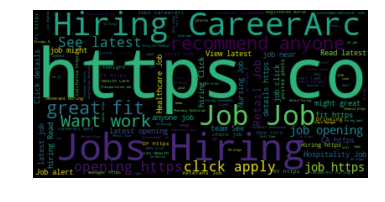

In [19]:
tweet_str = " ".join(tweets)
wordcloud = WordCloud(max_font_size=320).generate(tweet_str)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Then we try to cluster the tweets using K-means while each tweet is represented according to Bag of Words model.

### Preprocessing
* all numbers are replaced with a speical symbol \$NUM\$
* special character like #, ! are removed
* URL links are removed
* tokenization by space

### Clustering
run the following command 

       bokeh serve --show cluster.py
       
### Observations